In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(12.0, 8.0)})

# Context

In [2]:
data_set = pd.read_csv(r"C:\ml\train.csv")
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


# Data quality assessment

In [3]:
# Let's look what we have in data_set

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
# We have in data_set: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

# Categories: Survived, Sex, Embarked, Pclass
# Numeric: Age, Fare, SibSp, Parch

In [6]:
# Let's look what we can calculate now:

In [7]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [8]:
# We can see that we have some Null meanings in Age and Fare
# Let's check it:

In [9]:
data_set.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [10]:
# So we can see that not only Age and Fare have Null but also Ticket, Embarked and Cabin
# Cabin has Null meanings more than 50%, so it would be useless to make analisys by this variable

# Data exploration

In [11]:
# Let's start Data exploration by checking how much Male and Female persons were on board

,Sex,count
0,female,43886
1,male,56114


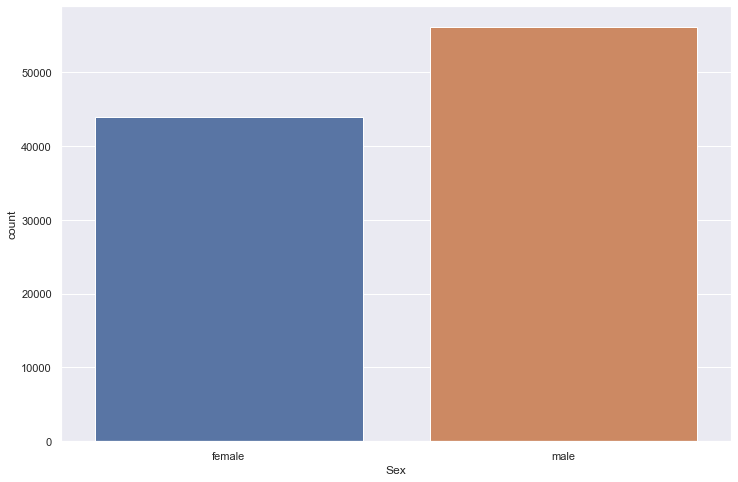

In [12]:
male_female = data_set.groupby(['Sex'])['Sex'].agg(['count']).reset_index()
sns.barplot(x=male_female['Sex'], y=male_female['count'])
male_female

In [13]:
# So we can conclude that Male persons were more than Female persons

In [14]:
# Let's calculate how many persons survived:

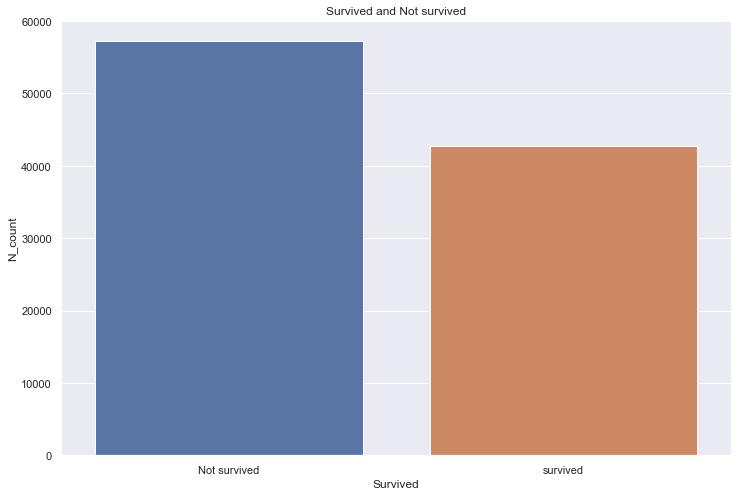

In [15]:
plt.title("Survived and Not survived")
survivings = data_set.groupby(['Survived'])['Survived'].agg(['count']).reset_index()
survivings['Survived'] = survivings['Survived'].map({1: 'survived', 0: 'Not survived'})
survivings = survivings.rename(columns={'count':'N_count'})
sns.barplot(x=survivings['Survived'], y=survivings['N_count']);

In [16]:
# So we can conclude that survived less than not survived

In [17]:
# Let's calculate survivings by sex:

In [18]:
sex_survivings = data_set.groupby(["Sex", "Survived"])[["Survived"]].count()
sex_survivings.rename(columns={"Survived":"Total"})

Total
Sex    Survived       
female 0         12660
       1         31226
male   0         44566
       1         11548

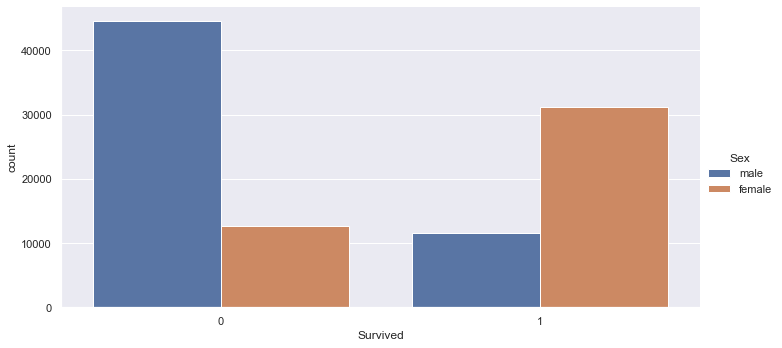

In [19]:
sns.catplot(x='Survived', data=data_set, kind="count", hue='Sex',  aspect=2, height=5)

In [20]:
# So we can see that Female persons survived more often than Male persons

In [21]:
# Let's check dependancy for Class survivings:

In [22]:
data_set[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.579779
1,2,0.525018
2,3,0.247305


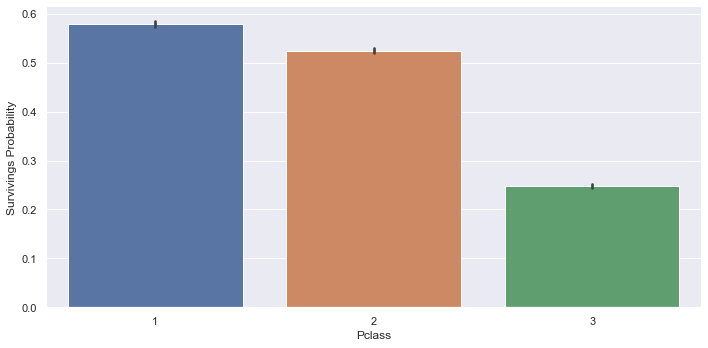

In [23]:
class_survivings = sns.catplot(x='Pclass', data=data_set, kind="bar", y="Survived",  aspect=2, height=5)
class_survivings.set_ylabels("Survivings Probability")
plt.show()

In [24]:
# So we can conclude that 1st and 2nd class survived more often than 3rd class

In [25]:
# Let's check age distribution:

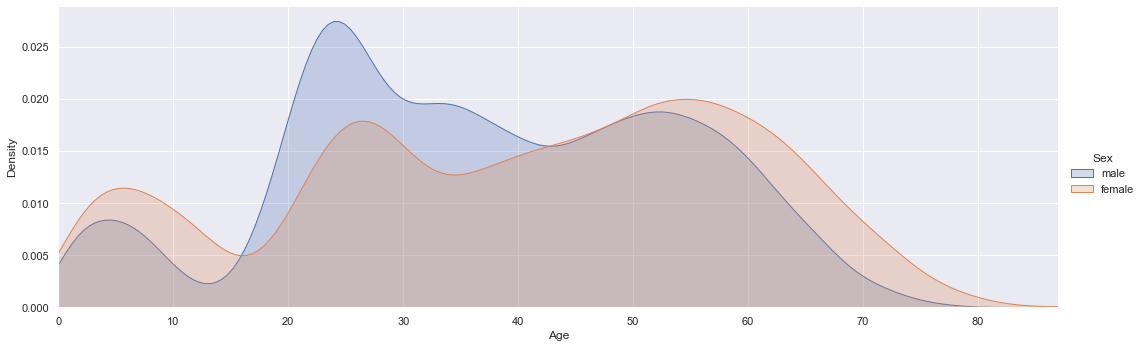

In [26]:
image = sns.FacetGrid(data_set, hue='Sex', aspect=3, height=5)
image.map(sns.kdeplot, 'Age', shade=True)
max_old = data_set['Age'].max()
image.set(xlim=(0, max_old))
image.add_legend()

In [27]:
# We can see that many of Male persons were about 24-25 years old.
# But women were with 3 peaks - 5 years, 27 years and mostly 55 years old.

In [28]:
# Let's check survivings depending on age:

Text(0.5, 1.0, 'Survivings depending on Age')

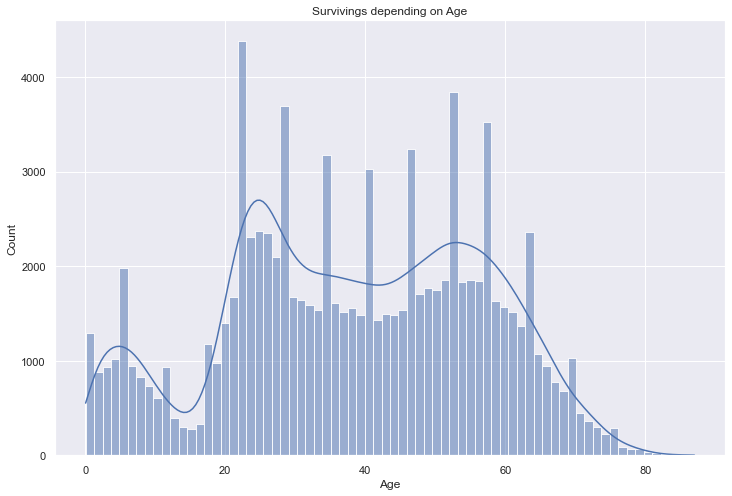

In [29]:
age_survivings = sns.histplot(data_set["Age"], kde=True)
age_survivings.set_title("Survivings depending on Age")

In [30]:
# Let's make several groups depending on age and check surviving probabilities:

C:\Users\Andrei_Medvedev\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


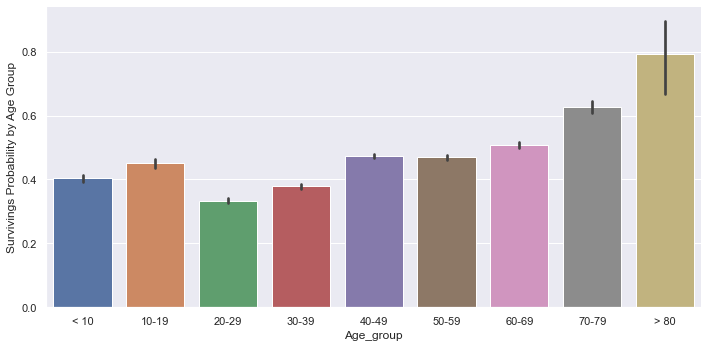

In [31]:
data_set["Age_group"] = data_set["Age"]
data_set["Age_group"].iloc[data_set["Age"] < 10] = "< 10"
data_set["Age_group"].iloc[(data_set["Age"] >= 10) & (data_set["Age"] < 20)] = "10-19"
data_set["Age_group"].iloc[(data_set["Age"] >= 20) & (data_set["Age"] < 30)] = "20-29"
data_set["Age_group"].iloc[(data_set["Age"] >= 30) & (data_set["Age"] < 40)] = "30-39"
data_set["Age_group"].iloc[(data_set["Age"] >= 40) & (data_set["Age"] < 50)] = "40-49"
data_set["Age_group"].iloc[(data_set["Age"] >= 50) & (data_set["Age"] < 60)] = "50-59"
data_set["Age_group"].iloc[(data_set["Age"] >= 60) & (data_set["Age"] < 70)] = "60-69"
data_set["Age_group"].iloc[(data_set["Age"] >= 70) & (data_set["Age"] < 80)] = "70-79"
data_set["Age_group"].iloc[(data_set["Age"] > 80)] = "> 80"

age_survivings = sns.catplot(x='Age_group', y="Survived", data=data_set, kind="bar", aspect=2, height=5, 
                            order=["< 10", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "> 80"])
age_survivings.set_ylabels("Survivings Probability by Age Group")

In [32]:
# So we can see that in group of age "> 80" survivings probability was almost 80%
# In group of age "70-79" more than 60%
# The smallest probability to survive was in group of age "20-29" 

In [33]:
# Let's check survival dependings according to ticket cost:

C:\Users\ANDREI~1\AppData\Local\Temp/ipykernel_8160/3628429159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare['Fare_Group'] = pd.qcut(fare['Fare'], 10)


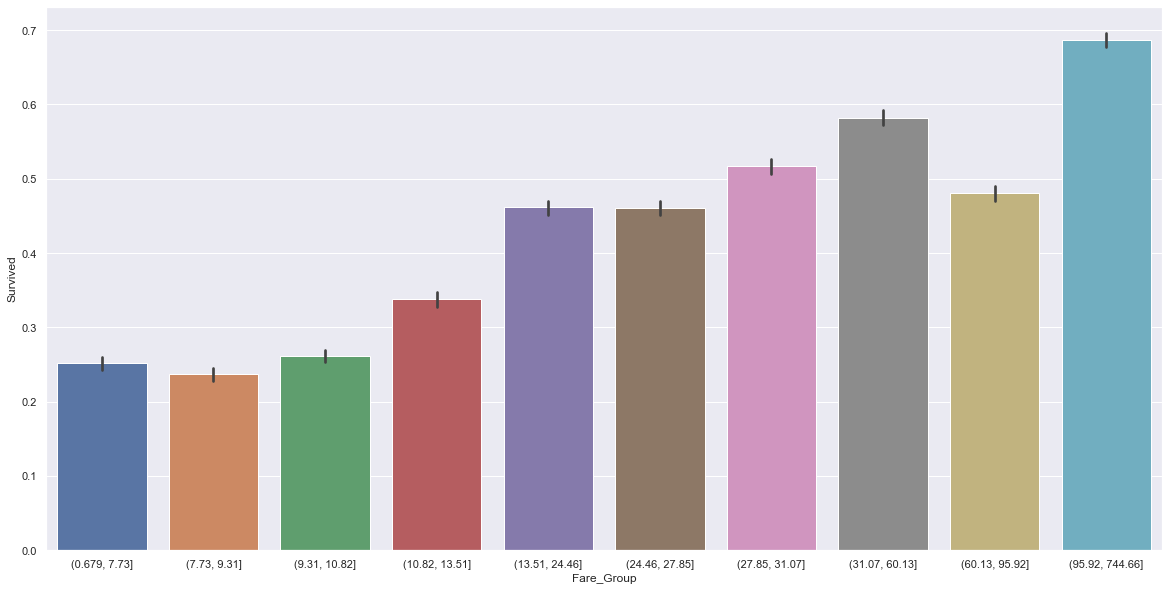

In [34]:
plt.figure(figsize=(20,10))
fare = data_set[['Survived', 'Fare']]
fare['Fare_Group'] = pd.qcut(fare['Fare'], 10)
sns.barplot(x ='Fare_Group', y ='Survived', data = fare);

In [35]:
# So we can see that survivings depends on ticket's cost:
# As much ticket cost as more probably to survive
# But little bit strange seems the group "60.13 - 95.92" - it is little bit decreasing in surviving probability
# Maybe this tickes cabins were more down in the ship, so it was hard to escape

# Summary

In [36]:
# Male persons were more than Female persons
# At the end survived less than not survived
# Female persons survived more often than Male persons

# We can see that many of Male persons were about 24-25 years old.
# But women were with 3 peaks - 5 years, 27 years and mostly 55 years old.

# We can see that in group of age "> 80" survivings probability was almost 80%
# In group of age "70-79" more than 60%
# The smallest probability to survive was in group of age "20-29" 

# So we can see that survivings depends on ticket's cost:
# As much ticket cost as more probably to survive
# But little bit strange seems the group "60.13 - 95.92" - it is little bit decreasing in surviving probability
# Maybe this tickes cabins were more down in the ship, so it was hard to escape